#### Day 3: python crash course (3/4)

In [1]:
# file I/O

import csv

filename = 'USDJPY.csv'
date_list = []
rate_list = []
with open(filename, newline = '') as csv_file:
    reader = csv.reader(csv_file, delimiter = ',')
    for row in reader:
        d, r = tuple(row)
        date_list.append(d)
        rate_list.append(float(r))

print(date_list[-5:])
print(rate_list[-5:])
print(len(date_list))

['2018/10/31', '2018/11/1', '2018/11/2', '2018/11/5', '2018/11/6']
[113.05, 112.67, 113.2, 113.17, 113.2]
5217


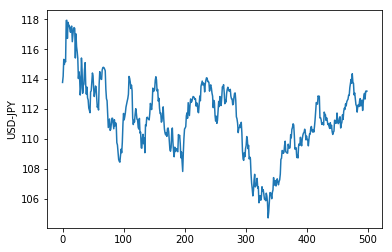

In [11]:
import matplotlib.pyplot as plt
import datetime

plt.plot(rate_list[-500:])
plt.ylabel('USD-JPY')
plt.show()

In [3]:
# exercise: find the max in rates and report the date

In [4]:
# functional programming: map, filter (alternatives to list comprehensions)

# example for map
languages = ["python", "perl", "java", "c++"]

# for-in loop
lens = []
for each_item in languages:
    lens.append(len(each_item))
print(lens)

# comprehension
lens2 = [len(each_item) for each_item in languages]    
print(lens2)

# map
print(list(map(len, languages)))

[6, 4, 4, 3]
[6, 4, 4, 3]
[6, 4, 4, 3]


In [5]:
# example for filter
fibs = [1, 1, 2, 3, 5, 8, 13, 21, 34]

def is_even(x):
    return x % 2 == 0

print(list(filter(is_even, fibs)))
print(list(filter(lambda x : x % 2 == 0, fibs)))

[2, 8, 34]
[2, 8, 34]


In [6]:
# exercises

q1 = [[1, 3], [4, 2, -5]] # => [4, 1]
ans1 = list(map(sum, q1))
print(ans1)

q2 = [1, True, [2, 3]] # => '1', 'True', '[2, 3]'
ans2 = list(map(str, q2))
print(ans2)

q3 = [0, 1, 0, 6, 'A', 1, 0, 7] # => <1, 6, 1, 7>
ans3 = list(filter(lambda x : x != 'A' and x != 0, q3))
print(ans3)

[4, 1]
['1', 'True', '[2, 3]']
[1, 6, 1, 7]


In [7]:
# lambda functions: aka anonymous function (one-time)

f = lambda x : x ** 2 + 1
print("f(10) =", f(10))

f(10) = 101


In [8]:
# iterators:
# (1) represents finite or infinite data streams, without storing all the elements at a time 
# (2) use iter(iterable) to create an iterator
# (3) use next() to get the next value 
# (3-1) the for loop gets values by calling next() implicitly

stock_pool = [2330, 2891]
iterator_of_stock_pool = iter(stock_pool)
print(next(iterator_of_stock_pool), end = " ")
print(next(iterator_of_stock_pool), end = " ")
# print(next(iterator_of_stock_pool), end = " ") # raise StopIteration Error 


2330 2891 

In [9]:
# generators
# (1) resumable functions, which have a new keyword "yield" inside
# (2) a generator is just a special type of iterator
# (3) like iterators, we can get the next value from a generator using next()

def integer_generator(n):
    for i in range(n):
        yield i

generator10 = integer_generator(10)
print("Before loop,", next(generator10))
print("In the loop,", end = " ")
for n in generator10:
    print(n, end = " ")

Before loop, 0
In the loop, 1 2 3 4 5 6 7 8 9 

Exercise: a simple price generator
* See [Black–Scholes model](https://en.wikipedia.org/wiki/Black%E2%80%93Scholes_model) in Wikipedia.
* In particular, Black and Scholes assume that the return of underlying asset follows a Brownian motion: $$\dfrac{dS}{S} = r dt + \sigma dW,$$ where $S$ is the price of underlying asset, $r$ is the annunal risk-free interest rate, $\sigma$ is the annual volatility, and $dW$ is a Wiener process following a standard normal distribution.
* To simulate a price path, we discretize the equation by finite difference, that is, $$\dfrac{dS}{S} \sim \dfrac{S_{i + 1} - S_{i}}{S_i} = r \Delta t + \sigma \sqrt{\Delta t} W_i$$ where $\Delta t = \frac{1}{252}$ and $W_i$ can be generated by numpy.random.randn().
* So we can calculate the price $S_{i + 1}$ by $$S_{i + 1} = S_{i} (1 + r \Delta t + \sigma \sqrt{\Delta t} W_i).$$

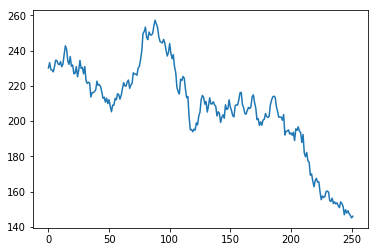

In [10]:
def price_generator(s0, N, r = 0.01, v = 0.25):
    
    import numpy as np
    import math

    dt = 1 / 252
    
    for i in range(N):
        W = np.random.randn()
        s0 = s0 * (1 + r * dt + v * math.sqrt(dt) * W) 
        yield s0

stock_2330 = list(price_generator(230, 252))

plt.plot(stock_2330)